In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
#loading train dataset saved loacally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)

In [3]:
#loading test dataset saved locally
path = 'data/'
filename = 'named_test.csv'
df_test= pd.read_csv(path+filename)

In [4]:
#observing the number of observations and features in train dataset
print(f'There are {df.shape[0]} observations and {df.shape[1]} features')

There are 112800 observations and 785 features


In [5]:
#observing the number of observations and features in test dataset
print(f'There are {df_test.shape[0]} observations and {df_test.shape[1]} features')

There are 18800 observations and 785 features


In [6]:
#glimpse of how train dataset looks like
df.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#glimpse of how test dataset looks like
df_test.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#checking all the columns in train dataset
df.columns.tolist()

['Target',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112',
 'x113',
 'x114',
 'x115',
 'x116',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x122',

In [9]:
#checking all the column datatypes in train dataset and all are observed to be int64
df.dtypes

Target    int64
x1        int64
x2        int64
x3        int64
x4        int64
          ...  
x780      int64
x781      int64
x782      int64
x783      int64
x784      int64
Length: 785, dtype: object

In [10]:
#defining the target variable in train dataset
y_column = 'Target'
y_train = df[y_column]
y_train

0         45
1         36
2         43
3         15
4          4
          ..
112795    22
112796    17
112797    23
112798    31
112799     8
Name: Target, Length: 112800, dtype: int64

In [11]:
#checking the location of first feature variable
df.columns.get_loc("x1")

1

In [12]:
#checking the location of last feature variable
df.columns.get_loc("x784")

784

In [13]:
# Defining the independent variables in train dataset
x_columns = df.iloc[:, 1:784] 
X_train = x_columns
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x774,x775,x776,x777,x778,x779,x780,x781,x782,x783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#defining the target variable in test dataset
y_column = 'Target'
y_test = df_test[y_column]

In [15]:
#defining the independent variables in test dataset
x_columns = df_test.iloc[:, 1:784] 
X_test = x_columns

In [16]:
#Building the default decision tree model
dtree = tree.DecisionTreeClassifier (criterion='gini')
#Fitting the model to the train data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#Using the model to predict on train and test dataset
y_pred_train=dtree.predict (X_train)
y_pred = dtree.predict (X_test)

In [18]:
from sklearn import metrics
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.5882446808510639


In [19]:
#calculating confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

[[192   0   1 ...   0   0   0]
 [  0 170   2 ...   3   0   5]
 [  1   0 233 ...   7   0   3]
 ...
 [  4   4   3 ... 123   2   8]
 [  1   0   0 ...   1 284   8]
 [  0   5   2 ...   4   8 224]]


In [20]:
#calculating precision and recall and printing the results
cm = metrics.confusion_matrix(y_test, y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.5882446808510637
Precision: 0.5896287478225573


In [21]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       400
           1       0.43      0.42      0.43       400
           2       0.56      0.58      0.57       400
           3       0.73      0.76      0.74       400
           4       0.59      0.59      0.59       400
           5       0.55      0.52      0.53       400
           6       0.71      0.73      0.72       400
           7       0.79      0.80      0.80       400
           8       0.53      0.50      0.51       400
           9       0.49      0.46      0.48       400
          10       0.59      0.54      0.56       400
          11       0.50      0.45      0.47       400
          12       0.70      0.77      0.73       400
          13       0.63      0.61      0.62       400
          14       0.61      0.62      0.62       400
          15       0.39      0.41      0.40       400
          16       0.63      0.55      0.59       400
          17       0.59    

In [22]:
#Building a tuned model with changing the hyperparameters with random knowledge
dtree_tuned = tree.DecisionTreeClassifier (criterion='gini',max_depth=20,splitter='best',min_samples_split=10)
#Using the tuned model to fit on train and test dataset
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred_n = dtree_tuned.predict (X_test)
y_pred_train_n=dtree_tuned.predict (X_train)

In [24]:
from sklearn import metrics
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_n))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_n))

Train Accuracy: 0.8572960992907801
Test Accuracy: 0.5977127659574468


In [25]:
#Using gridsearchcv to get the best hyperparameters with best accuracy 
parameters = {'max_depth':[50], 'min_samples_leaf':[1,2,5,10]}
dtree_classifier = tree.DecisionTreeClassifier()
classifier = GridSearchCV(dtree_classifier,parameters, cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [50], 'min_samples_leaf': [1, 2, 5, 10]}

In [26]:
#hyperparameters values for the best accuracy
classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [27]:
#fitting the model for the best classifier
bestclassifier = tree.DecisionTreeClassifier(**classifier.best_estimator_.get_params())
bestclassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#Using the best fit model to predict on train and test dataset
y_pred_b = bestclassifier.predict (X_test)
y_pred_train_b=bestclassifier.predict (X_train)

In [29]:
#calculating train and test accuracy for best fit model 
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_b))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_b))

Train Accuracy: 0.7565336879432624
Test Accuracy: 0.6022340425531915


In [30]:
#calculating confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_b))

[[206   0   2 ...   0   0   0]
 [  0 190   1 ...   1   0   1]
 [  2   0 237 ...   1   1   2]
 ...
 [  1   1   4 ... 120   3   4]
 [  0   1   0 ...   1 282   3]
 [  2   7   0 ...   7   8 217]]


In [31]:
#calculating precision and recall and printing the results for the best fit model
cm = metrics.confusion_matrix(y_test, y_pred_b)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.6022340425531915
Precision: 0.6013726731265572


In [32]:
print(metrics.classification_report(y_test,y_pred_b))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       400
           1       0.43      0.47      0.45       400
           2       0.56      0.59      0.57       400
           3       0.69      0.76      0.72       400
           4       0.58      0.64      0.61       400
           5       0.56      0.53      0.54       400
           6       0.66      0.72      0.69       400
           7       0.81      0.82      0.81       400
           8       0.55      0.56      0.55       400
           9       0.50      0.56      0.53       400
          10       0.58      0.62      0.60       400
          11       0.52      0.50      0.51       400
          12       0.71      0.79      0.74       400
          13       0.65      0.62      0.63       400
          14       0.61      0.64      0.63       400
          15       0.43      0.43      0.43       400
          16       0.65      0.54      0.59       400
          17       0.57    

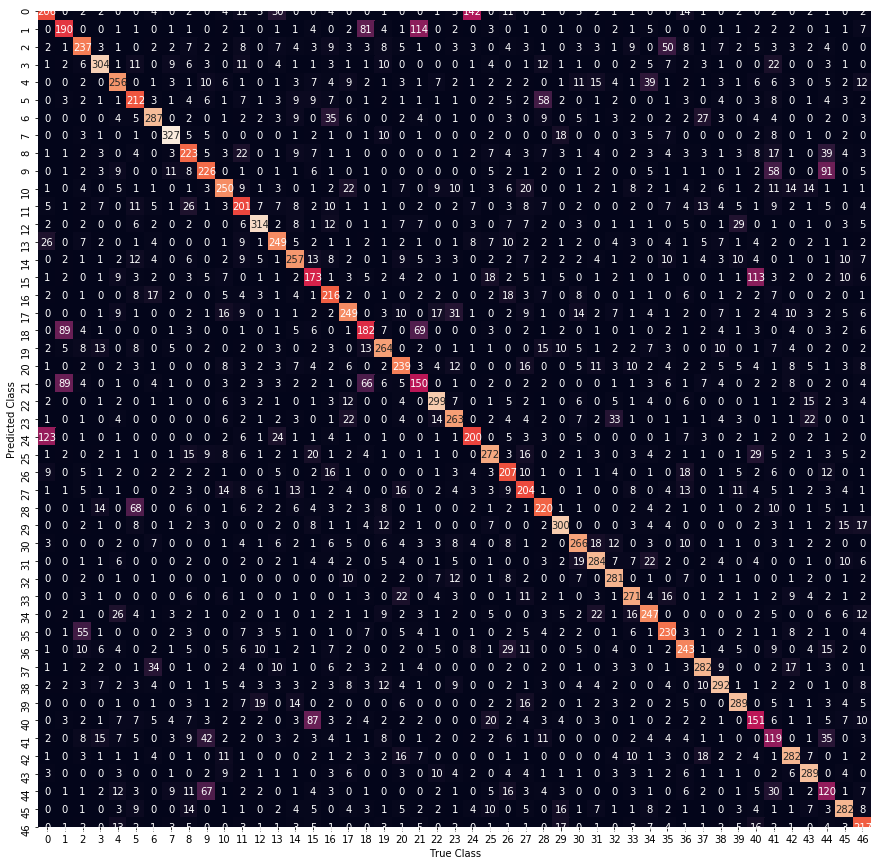

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns

# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=confusion_matrix(y_test,y_pred_b)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()